In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
import json
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't comp leted the Foursquare API lab 
from geopy.geocoders import Nominatim # convert an address into latitude and longit ude values
import requests # library to handle requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas datafr ame
import matplotlib.cm as cm 
import matplotlib.colors as colors 
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup 
import xml 
!conda install -c conda-forge folium=0.5.0 --yes 
import folium
print('Libraries imported.') 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [5]:
pwd

'/home/dsxuser/work'

<h1> Ftech Neighbour</h1>

In [14]:
# The code was removed by Watson Studio for sharing.

,_id,ID,ADDRESS_INFO,NAME,CATEGORY,PHONE,EMAIL,WEBSITE,GEOID,RECEIVED_DATA_DATE,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,MI_PRINX,ATTRACTION_LEVEL,ATTRACTION_DESC,IMAGE_NAME,MAP_ACCESS,geometry
0,1,16,NaN,BMO Field,Sports / Entertainment Venue,416-815-5982,NaN,www.bmofield.com,20229243.0,NaN,20229243.0,170.0,Princes' Blvd,170 Princes' Blvd,M6K 3C3,former TORONTO,Toronto,CNE BMO Field,107007.0,20231258.0,170.0,NaN,NaN,NaN,20228.0,NaN,NaN,NaN,NaN,16,4163950.0,2,BMO Field is home to the Toronto FC (Major Lea...,BMOField.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.41861..."
1,2,1,NaN,Aga Khan Museum,Museum,416-646-4677,NaN,www.agakhanmuseum.org,10142948.0,NaN,10142948.0,77.0,Wynford Dr,77 Wynford Dr,M3C 1K1,NORTH YORK,Toronto,NaN,107008.0,444094.0,77.0,NaN,NaN,NaN,7128.0,NaN,NaN,NaN,NaN,1,4094277.0,1,"Dedicated to sharing the artistic, intellectua...",AgaKhan.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.33233..."
2,3,2,NaN,Air Canada Centre,Sports / Entertainment Venue,416-815-5500,NaN,www.theaircanadacentre.com/,7929257.0,NaN,7929257.0,40.0,Bay St,40 Bay St,M5J 2X2,former TORONTO,Toronto,Air Canada Centre,107010.0,7929256.0,40.0,NaN,NaN,NaN,2962.0,NaN,NaN,NaN,NaN,2,3176821.0,1,The Air Canada Centre is a multi-purpose indoo...,AirCanadaCentre.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.37900..."
3,4,3,NaN,Al Green Theatre (at the Miles Nadal Jewish Co...,Performing Arts,416-924-6211,NaN,www.algreentheatre.ca/,8418224.0,NaN,8418224.0,750.0,Spadina Ave,750 Spadina Ave,M5S 2J2,former TORONTO,Toronto,Miles Nadal Jewish Community Centre,115001.0,8418213.0,750.0,NaN,NaN,NaN,4426.0,NaN,NaN,NaN,NaN,3,1951177.0,4,The Al Green Theatre is used for social and c...,NaN,N,"{u'type': u'Point', u'coordinates': (-79.40406..."
4,5,4,NaN,Alexander Muir Memorial Gardens,Nature/ Park,416-338-4386,NaN,http://www1.toronto.ca/parks/prd/facilities/co...,10154587.0,NaN,10154587.0,2901.0,Yonge St,2901 Yonge St,NaN,former TORONTO,Toronto,Alexander Muir Memorial Gardens,106001.0,30094595.0,2901.0,NaN,NaN,NaN,4733.0,NaN,NaN,NaN,NaN,4,4217141.0,4,Named after the famous composer Alexander Muir...,Imageplaceholder.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.40116..."


<h1> Fetching Crime Data</h1>

In [37]:

body = client_29f233d5307449758600422a0ed39b72.get_object(Bucket='thecapstoneproject-donotdelete-pr-nzecuspnuylgzb',Key='Toronto_Neighbourhood_City_Crimes.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime_df = pd.read_excel(body)
crime_df.head()


,Neighbourhood,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts,Total
0,West Humber-Clairville,1,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288,4980
1,Mount Olive-Silverstone-Jamestown,2,3,316,61,90,1016,59,361,176,1,78,75,7,690,62,2995
2,Thistletown-Beaumond Heights,3,0,85,36,16,323,48,90,34,0,17,24,2,192,12,879
3,Rexdale-Kipling,4,0,59,32,15,305,34,94,55,1,16,20,3,164,18,816
4,Elms-Old Rexdale,5,1,77,25,14,321,71,107,43,0,23,5,19,185,22,913


In [42]:
crime_data = crime_df.iloc[:, [0,16]]

In [43]:
crime_data.head()

,Neighbourhood,Total
0,West Humber-Clairville,4980
1,Mount Olive-Silverstone-Jamestown,2995
2,Thistletown-Beaumond Heights,879
3,Rexdale-Kipling,816
4,Elms-Old Rexdale,913


In [47]:
crime_data.describe() 

,Crime_Count
count,140.000000
mean,1772.328571
std,1135.592144
min,487.000000
25%,987.500000
50%,1484.500000
75%,2083.250000
max,6668.000000


In [57]:
address = 'Kingsway South' #'Markland Wood,Black Creek'  
geolocator = Nominatim() 
location = geolocator.geocode(address) 
print(location)
latitude = location.latitude 
longitude = location.longitude 
print('The geograpical coordinate of Kingsway South is {}, {}.'.format( latitude, longitude)) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


Kingsway South, Team Valley Trading Estate, Lamesley, Gateshead, Tyne and Wear, North East England, England, NE11 0SP, United Kingdom
The geograpical coordinate of Markland Wood,Black Creek is 54.9234466, -1.6134482.


In [59]:
Kingsway_South_map = folium.Map(location=[54.9234466, -1.6134482], width=1000, height=750,zoom_start=12)  
Kingsway_South_map 

In [61]:
print(crime_df)

                         Neighbourhood  Neighbourhood Id  Arsons  Assaults  \
0               West Humber-Clairville                 1       4       390   
1    Mount Olive-Silverstone-Jamestown                 2       3       316   
2         Thistletown-Beaumond Heights                 3       0        85   
3                      Rexdale-Kipling                 4       0        59   
4                     Elms-Old Rexdale                 5       1        77   
5        Kingsview Village-The Westway                 6       0       134   
6     Willowridge-Martingrove-Richview                 7       2       131   
7             Humber Heights-Westmount                 8       1        41   
8             Edenbridge-Humber Valley                 9       1        57   
9                   Princess-Rosethorn                10       0        48   
10      Eringate-Centennial-West Deane                11       0        58   
11                       Markland Wood                12       0

In [62]:
crime_data.describe()

,Crime_Count
count,140.000000
mean,1772.328571
std,1135.592144
min,487.000000
25%,987.500000
50%,1484.500000
75%,2083.250000
max,6668.000000


In [65]:
crime_data.head()

,Neighbourh,Crime_Count
0,West Humber-Clairville,4980
1,Mount Olive-Silverstone-Jamestown,2995
2,Thistletown-Beaumond Heights,879
3,Rexdale-Kipling,816
4,Elms-Old Rexdale,913


<h2> Crime Plot</h2>

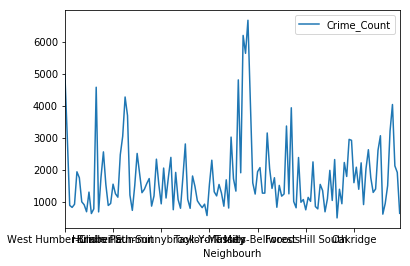

In [67]:
crime_data.plot(x='Neighbourh', y='Crime_Count') 

In [69]:
mvcrime_df = crime_df.loc[crime_df['Total'] <= 5000] 
mvcrime_df 

,Neighbourhood,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts,Total
0,West Humber-Clairville,1,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288,4980
1,Mount Olive-Silverstone-Jamestown,2,3,316,61,90,1016,59,361,176,1,78,75,7,690,62,2995
2,Thistletown-Beaumond Heights,3,0,85,36,16,323,48,90,34,0,17,24,2,192,12,879
3,Rexdale-Kipling,4,0,59,32,15,305,34,94,55,1,16,20,3,164,18,816
4,Elms-Old Rexdale,5,1,77,25,14,321,71,107,43,0,23,5,19,185,22,913
5,Kingsview Village-The Westway,6,0,134,59,47,680,186,244,117,1,32,22,8,351,48,1929
6,Willowridge-Martingrove-Richview,7,2,131,66,18,640,78,228,111,0,48,22,8,342,49,1743
7,Humber Heights-Westmount,8,1,41,28,12,512,37,165,64,0,15,1,1,106,8,991
8,Edenbridge-Humber Valley,9,1,57,75,4,317,25,113,73,0,18,5,5,185,21,899
9,Princess-Rosethorn,10,0,48,50,16,214,22,76,54,0,17,1,9,157,16,680


In [70]:
mvcrime_df.describe()

,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts,Total
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,70.379562,1.065693,139.459854,73.897810,34.751825,596.605839,84.642336,220.627737,105.430657,0.343066,32.700730,16.927007,6.189781,333.883212,29.613139,1676.138686
std,40.995002,1.207844,92.992648,41.588546,38.361819,325.256038,71.777817,148.368332,51.861069,0.623533,23.720606,13.965627,6.450642,205.448615,34.295911,937.613249
min,1.000000,0.000000,16.000000,12.000000,0.000000,207.000000,3.000000,45.000000,26.000000,0.000000,3.000000,1.000000,0.000000,81.000000,3.000000,487.000000
25%,35.000000,0.000000,69.000000,44.000000,13.000000,340.000000,40.000000,119.000000,64.000000,0.000000,16.000000,8.000000,2.000000,185.000000,13.000000,977.000000
50%,69.000000,1.000000,123.000000,62.000000,24.000000,502.000000,66.000000,180.000000,97.000000,0.000000,27.000000,14.000000,5.000000,292.000000,21.000000,1409.000000
75%,106.000000,2.000000,181.000000,96.000000,43.000000,771.000000,108.000000,276.000000,134.000000,1.000000,42.000000,21.000000,8.000000,404.000000,35.000000,2046.000000
max,140.000000,6.000000,412.000000,219.000000,302.000000,1824.000000,502.000000,805.000000,257.000000,3.000000,120.000000,75.000000,54.000000,1119.000000,288.000000,4980.000000


In [71]:
drug_df = crime_df.loc[crime_df['Drug Arrests'] <= 500] 
drug_df.head()
drug_df.describe()

,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts,Total
count,140.0000,140.000000,140.000000,140.00000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,1.114286,150.621429,75.25000,36.542857,632.200000,88.200000,240.328571,108.228571,0.350000,34.442857,17.621429,6.478571,351.128571,29.821429,1772.328571
std,40.5586,1.269939,121.538369,42.15595,39.964980,404.120667,76.219316,198.576714,55.022342,0.622423,26.352145,14.641258,6.748800,235.957009,34.029033,1135.592144
min,1.0000,0.000000,16.000000,12.00000,0.000000,207.000000,3.000000,45.000000,26.000000,0.000000,3.000000,1.000000,0.000000,81.000000,3.000000,487.000000
25%,35.7500,0.000000,69.750000,44.75000,13.000000,343.750000,40.000000,119.000000,64.000000,0.000000,16.000000,8.000000,2.750000,185.000000,13.000000,987.500000
50%,70.5000,1.000000,124.000000,63.00000,25.000000,509.500000,66.000000,182.000000,97.500000,0.000000,28.000000,14.000000,5.000000,294.000000,21.000000,1484.500000
75%,105.2500,2.000000,184.000000,99.00000,46.250000,788.250000,111.500000,277.750000,135.750000,1.000000,44.000000,21.250000,8.000000,412.500000,35.000000,2083.250000
max,140.0000,6.000000,892.000000,219.00000,302.000000,2631.000000,502.000000,1203.000000,272.000000,3.000000,124.000000,75.000000,54.000000,1393.000000,288.000000,6668.000000


In [73]:

body = client_29f233d5307449758600422a0ed39b72.get_object(Bucket='thecapstoneproject-donotdelete-pr-nzecuspnuylgzb',Key='wellbeing-toronto-demographics.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

demog_df = pd.read_excel(body)

demog_df.head()

,PROVENANCE,SHORT_NAME,LONG_NAME,DESCRIPTION,URL,CURRENCY,DATE_UPDATED,DOMAIN
0,Statistics Canada Census,Total Population,Total Population - All gender and age groups,"For Reference Period 2008: Census 2006, All Ge...",http://www12.statcan.gc.ca/census-recensement/...,2011-04-25,2013-03-22 11:09:41,Demographics
1,Statistics Canada Census,Pop - Males,Total Population - Males,"For Reference Period 2008: Census 2006, Total ...",http://www12.statcan.gc.ca/census-recensement/...,2011-04-25,2013-03-22 11:10:28,Demographics
2,Statistics Canada Census,Pop - Females,Total Population - Females,"For Reference Period 2008: Census 2006, Total ...",http://www12.statcan.gc.ca/census-recensement/...,2011-04-25,2013-03-22 11:11:09,Demographics
3,Statistics Canada Census,Pop 0 - 4 years,Total Population 0 - 4 years,"For Reference Period 2008: Census 2006, 0-4 ye...",http://www12.statcan.gc.ca/census-recensement/...,2011-04-25,2013-03-22 11:11:44,Demographics
4,Statistics Canada Census,Pop 5 - 9 years,Total Population 5 - 9 years,"For Reference Period 2008: Census 2006, 5-9 ye...",http://www12.statcan.gc.ca/census-recensement/...,2011-04-25,2013-03-22 11:12:25,Demographics


In [74]:

body = client_29f233d5307449758600422a0ed39b72.get_object(Bucket='thecapstoneproject-donotdelete-pr-nzecuspnuylgzb',Key='Places of Interest and Attractions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

places_df = pd.read_csv(body)
places_df.head()


,_id,ID,ADDRESS_INFO,NAME,CATEGORY,PHONE,EMAIL,WEBSITE,GEOID,RECEIVED_DATA_DATE,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,MI_PRINX,ATTRACTION_LEVEL,ATTRACTION_DESC,IMAGE_NAME,MAP_ACCESS,geometry
0,1,16,NaN,BMO Field,Sports / Entertainment Venue,416-815-5982,NaN,www.bmofield.com,20229243.0,NaN,20229243.0,170.0,Princes' Blvd,170 Princes' Blvd,M6K 3C3,former TORONTO,Toronto,CNE BMO Field,107007.0,20231258.0,170.0,NaN,NaN,NaN,20228.0,NaN,NaN,NaN,NaN,16,4163950.0,2,BMO Field is home to the Toronto FC (Major Lea...,BMOField.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.41861..."
1,2,1,NaN,Aga Khan Museum,Museum,416-646-4677,NaN,www.agakhanmuseum.org,10142948.0,NaN,10142948.0,77.0,Wynford Dr,77 Wynford Dr,M3C 1K1,NORTH YORK,Toronto,NaN,107008.0,444094.0,77.0,NaN,NaN,NaN,7128.0,NaN,NaN,NaN,NaN,1,4094277.0,1,"Dedicated to sharing the artistic, intellectua...",AgaKhan.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.33233..."
2,3,2,NaN,Air Canada Centre,Sports / Entertainment Venue,416-815-5500,NaN,www.theaircanadacentre.com/,7929257.0,NaN,7929257.0,40.0,Bay St,40 Bay St,M5J 2X2,former TORONTO,Toronto,Air Canada Centre,107010.0,7929256.0,40.0,NaN,NaN,NaN,2962.0,NaN,NaN,NaN,NaN,2,3176821.0,1,The Air Canada Centre is a multi-purpose indoo...,AirCanadaCentre.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.37900..."
3,4,3,NaN,Al Green Theatre (at the Miles Nadal Jewish Co...,Performing Arts,416-924-6211,NaN,www.algreentheatre.ca/,8418224.0,NaN,8418224.0,750.0,Spadina Ave,750 Spadina Ave,M5S 2J2,former TORONTO,Toronto,Miles Nadal Jewish Community Centre,115001.0,8418213.0,750.0,NaN,NaN,NaN,4426.0,NaN,NaN,NaN,NaN,3,1951177.0,4,The Al Green Theatre is used for social and c...,NaN,N,"{u'type': u'Point', u'coordinates': (-79.40406..."
4,5,4,NaN,Alexander Muir Memorial Gardens,Nature/ Park,416-338-4386,NaN,http://www1.toronto.ca/parks/prd/facilities/co...,10154587.0,NaN,10154587.0,2901.0,Yonge St,2901 Yonge St,NaN,former TORONTO,Toronto,Alexander Muir Memorial Gardens,106001.0,30094595.0,2901.0,NaN,NaN,NaN,4733.0,NaN,NaN,NaN,NaN,4,4217141.0,4,Named after the famous composer Alexander Muir...,Imageplaceholder.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.40116..."


In [75]:
Kingsway_South_map = folium.Map(location=[43.6326640112,-79.4186143], width=1000, height=750,zoom_start=12)  
Kingsway_South_map  

In [76]:

body = client_29f233d5307449758600422a0ed39b72.get_object(Bucket='thecapstoneproject-donotdelete-pr-nzecuspnuylgzb',Key='Locations.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

location_df = pd.read_excel(body)
location_df.head()
 

,ID,NAME,GEOID,OBJECTID,Longitude,Latitude
0,16,BMO Field,20229243.0,16,-79.418614,43.632664
1,1,Aga Khan Museum,10142948.0,1,-79.332331,43.725386
2,2,Air Canada Centre,7929257.0,2,-79.379001,43.643438
3,3,Al Green Theatre (at the Miles Nadal Jewish Co...,8418224.0,3,-79.404062,43.666207
4,4,Alexander Muir Memorial Gardens,10154587.0,4,-79.401164,43.721534


In [79]:
location_df.drop(['ID','GEOID','OBJECTID'], axis=1,inplace=True)
location_df.head()

,NAME,Longitude,Latitude
0,BMO Field,-79.418614,43.632664
1,Aga Khan Museum,-79.332331,43.725386
2,Air Canada Centre,-79.379001,43.643438
3,Al Green Theatre (at the Miles Nadal Jewish Co...,-79.404062,43.666207
4,Alexander Muir Memorial Gardens,-79.401164,43.721534


<h3> Adding Markers</h3>

In [83]:
for lat, lng, point in zip(location_df['Latitude'], location_df['Longitude'], location_df['NAME']):
    label = '{}'.format(point)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radium=1,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7,parse_html=False).add_to(Kingsway_South_map) 


In [84]:
Kingsway_South_map

<h1>Explore Fredericton Neighbourhoods</h1>

In [86]:
CLIENT_ID = 'B2ECFG3BPAB330DEZOEWKLYWNW2STVDC435E25EZ03YVON22' # your Foursquare ID 
CLIENT_SECRET = 'BXN00YN5QBN4EYW0MWUJV2MTQIA3KX1JSCHLLRRG2HJZKKZW' # your Foursquare Secret 
VERSION = '20181201' # Foursquare API version  
print('Your credentails:') 
print('CLIENT_ID: ' + CLIENT_ID) 
print('CLIENT_SECRET:' + CLIENT_SECRET) 

Your credentails:
CLIENT_ID: B2ECFG3BPAB330DEZOEWKLYWNW2STVDC435E25EZ03YVON22
CLIENT_SECRET:BXN00YN5QBN4EYW0MWUJV2MTQIA3KX1JSCHLLRRG2HJZKKZW


In [91]:

body = client_29f233d5307449758600422a0ed39b72.get_object(Bucket='thecapstoneproject-donotdelete-pr-nzecuspnuylgzb',Key='Places of Interest and Attractions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

places_df = pd.read_csv(body)
places_df.head()


,_id,ID,ADDRESS_INFO,NAME,CATEGORY,PHONE,EMAIL,WEBSITE,GEOID,RECEIVED_DATA_DATE,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,MI_PRINX,ATTRACTION_LEVEL,ATTRACTION_DESC,IMAGE_NAME,MAP_ACCESS,geometry
0,1,16,NaN,BMO Field,Sports / Entertainment Venue,416-815-5982,NaN,www.bmofield.com,20229243.0,NaN,20229243.0,170.0,Princes' Blvd,170 Princes' Blvd,M6K 3C3,former TORONTO,Toronto,CNE BMO Field,107007.0,20231258.0,170.0,NaN,NaN,NaN,20228.0,NaN,NaN,NaN,NaN,16,4163950.0,2,BMO Field is home to the Toronto FC (Major Lea...,BMOField.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.41861..."
1,2,1,NaN,Aga Khan Museum,Museum,416-646-4677,NaN,www.agakhanmuseum.org,10142948.0,NaN,10142948.0,77.0,Wynford Dr,77 Wynford Dr,M3C 1K1,NORTH YORK,Toronto,NaN,107008.0,444094.0,77.0,NaN,NaN,NaN,7128.0,NaN,NaN,NaN,NaN,1,4094277.0,1,"Dedicated to sharing the artistic, intellectua...",AgaKhan.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.33233..."
2,3,2,NaN,Air Canada Centre,Sports / Entertainment Venue,416-815-5500,NaN,www.theaircanadacentre.com/,7929257.0,NaN,7929257.0,40.0,Bay St,40 Bay St,M5J 2X2,former TORONTO,Toronto,Air Canada Centre,107010.0,7929256.0,40.0,NaN,NaN,NaN,2962.0,NaN,NaN,NaN,NaN,2,3176821.0,1,The Air Canada Centre is a multi-purpose indoo...,AirCanadaCentre.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.37900..."
3,4,3,NaN,Al Green Theatre (at the Miles Nadal Jewish Co...,Performing Arts,416-924-6211,NaN,www.algreentheatre.ca/,8418224.0,NaN,8418224.0,750.0,Spadina Ave,750 Spadina Ave,M5S 2J2,former TORONTO,Toronto,Miles Nadal Jewish Community Centre,115001.0,8418213.0,750.0,NaN,NaN,NaN,4426.0,NaN,NaN,NaN,NaN,3,1951177.0,4,The Al Green Theatre is used for social and c...,NaN,N,"{u'type': u'Point', u'coordinates': (-79.40406..."
4,5,4,NaN,Alexander Muir Memorial Gardens,Nature/ Park,416-338-4386,NaN,http://www1.toronto.ca/parks/prd/facilities/co...,10154587.0,NaN,10154587.0,2901.0,Yonge St,2901 Yonge St,NaN,former TORONTO,Toronto,Alexander Muir Memorial Gardens,106001.0,30094595.0,2901.0,NaN,NaN,NaN,4733.0,NaN,NaN,NaN,NaN,4,4217141.0,4,Named after the famous composer Alexander Muir...,Imageplaceholder.jpg,Y,"{u'type': u'Point', u'coordinates': (-79.40116..."


In [92]:
univen = places_df.groupby('NAME').nunique('CATEGORY') 
univen 

,_id,ID,ADDRESS_INFO,NAME,CATEGORY,PHONE,EMAIL,WEBSITE,GEOID,RECEIVED_DATA_DATE,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,MI_PRINX,ATTRACTION_LEVEL,ATTRACTION_DESC,IMAGE_NAME,MAP_ACCESS,geometry
NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aga Khan Museum,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1
Air Canada Centre,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1
Al Green Theatre (at the Miles Nadal Jewish Community Centre),1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1,1
Alexander Muir Memorial Gardens,1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1
Allan Gardens,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1
Alumnae Theatre,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1
Art Gallery of Ontario,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1
Ashbridges Bay Park,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1
BAPS Shri Swaminarayan Mandir,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1


In [93]:
univen.shape

(175, 36)

<h3>Group rows by location and by the mean of the frequency of occurrence of each category</h3>

In [95]:
univen_grouped = places_df.groupby('NAME').mean().reset_index() 
univen_grouped 

,NAME,_id,ID,EMAIL,GEOID,RECEIVED_DATA_DATE,ADDRESS_POINT_ID,ADDRESS_NUMBER,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,MI_PRINX,ATTRACTION_LEVEL
0,Aga Khan Museum,2,1,NaN,10142948.0,NaN,10142948.0,77.0,107008.0,444094.0,77.0,NaN,NaN,NaN,7128.0,NaN,NaN,NaN,NaN,1,4094277.0,1
1,Air Canada Centre,3,2,NaN,7929257.0,NaN,7929257.0,40.0,107010.0,7929256.0,40.0,NaN,NaN,NaN,2962.0,NaN,NaN,NaN,NaN,2,3176821.0,1
2,Al Green Theatre (at the Miles Nadal Jewish Co...,4,3,NaN,8418224.0,NaN,8418224.0,750.0,115001.0,8418213.0,750.0,NaN,NaN,NaN,4426.0,NaN,NaN,NaN,NaN,3,1951177.0,4
3,Alexander Muir Memorial Gardens,5,4,NaN,10154587.0,NaN,10154587.0,2901.0,106001.0,30094595.0,2901.0,NaN,NaN,NaN,4733.0,NaN,NaN,NaN,NaN,4,4217141.0,4
4,Allan Gardens,6,5,NaN,12387690.0,NaN,12387690.0,19.0,115001.0,30055840.0,19.0,NaN,NaN,NaN,3695.0,NaN,NaN,NaN,NaN,5,3358221.0,2
5,Alumnae Theatre,7,6,NaN,11070101.0,NaN,11070101.0,70.0,115001.0,11070091.0,70.0,NaN,NaN,NaN,2995.0,NaN,NaN,NaN,NaN,6,2198005.0,3
6,Art Gallery of Ontario,8,7,NaN,796549.0,NaN,796549.0,317.0,107010.0,1144804.0,317.0,NaN,NaN,NaN,558.0,NaN,NaN,NaN,NaN,7,3838389.0,1
7,Ashbridges Bay Park,9,8,NaN,7650406.0,NaN,7650406.0,1675.0,106001.0,13973014.0,1675.0,NaN,NaN,NaN,3803.0,NaN,NaN,NaN,NaN,8,4149245.0,3
8,BAPS Shri Swaminarayan Mandir,11,9,NaN,7063040.0,NaN,7063040.0,61.0,114001.0,7063031.0,61.0,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,9,2361585.0,2
9,BMO Field,1,16,NaN,20229243.0,NaN,20229243.0,170.0,107007.0,20231258.0,170.0,NaN,NaN,NaN,20228.0,NaN,NaN,NaN,NaN,16,4163950.0,2
